[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/NktBkzn/HSE_DL_2021/blob/master/12_week/Weather_forecast_RNN.ipynb)

## Задача прогнозирования потока статей в научный журнал

В примере есть поток статей и даты за предыдущие года с 2012 по 2022. Задача спрогнохировать поток статей на 2023 год с учётом всех исторических данных.

Эта задач легко решается простейшими медотами прогнозирования ARIMA, GARCH,  Holt-Winters и т. д. Данный пример сделал только в качестве проверки работоспособности.


In [ ]:
!pip install torchsummary
import time
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torchsummary import summary
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import os
%matplotlib inline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
fname = 'journal_count_article_by_dates.csv'

f = open(fname)
data = f.read()

tmp = pd.read_csv(fname,nrows=132,sep=";")
tmp_ = tmp

f.close()

data


lines = data.split('\n')
header = lines[0].split(';')
lines = lines[1:133]
#lines = lines[1:]

print(header)
print(len(lines))

print(lines)

['Date', 'Count']
132
['31.01.2012;1', '29.02.2012;1', '31.03.2012;2', '30.04.2012;1', '31.05.2012;5', '30.06.2012;7', '31.07.2012;14', '31.08.2012;1', '30.09.2012;2', '31.10.2012;3', '30.11.2012;0', '31.12.2012;8', '31.01.2013;5', '28.02.2013;4', '31.03.2013;5', '30.04.2013;3', '31.05.2013;0', '30.06.2013;3', '31.07.2013;2', '31.08.2013;1', '30.09.2013;4', '31.10.2013;3', '30.11.2013;0', '31.12.2013;2', '31.01.2014;1', '28.02.2014;21', '31.03.2014;4', '30.04.2014;3', '31.05.2014;1', '30.06.2014;5', '31.07.2014;19', '31.08.2014;0', '30.09.2014;4', '31.10.2014;1', '30.11.2014;10', '31.12.2014;6', '31.01.2015;2', '28.02.2015;4', '31.03.2015;1', '30.04.2015;4', '31.05.2015;1', '30.06.2015;6', '31.07.2015;2', '31.08.2015;1', '30.09.2015;2', '31.10.2015;6', '30.11.2015;6', '31.12.2015;4', '31.01.2016;3', '29.02.2016;6', '31.03.2016;5', '30.04.2016;2', '31.05.2016;0', '30.06.2016;5', '31.07.2016;1', '31.08.2016;2', '30.09.2016;2', '31.10.2016;0', '30.11.2016;22', '31.12.2016;3', '31.01.2017;

In [ ]:
#tmp = pd.read_csv(fname,sep=";")
#tmp_ = pd.read_csv(fname, sep=";")

tmp['Date'] = pd.to_datetime(tmp['Date'], format="%d.%m.%Y")
tmp_['Date'] = pd.to_datetime(tmp_['Date'], format="%d.%m.%Y")

переведем все в numpy array

In [ ]:
float_data = np.zeros((len(lines), len(header) - 1))
float_data
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(';')[1:]]
    #print(values)
    float_data[i, :] = values

нарисуем график поступивших статей

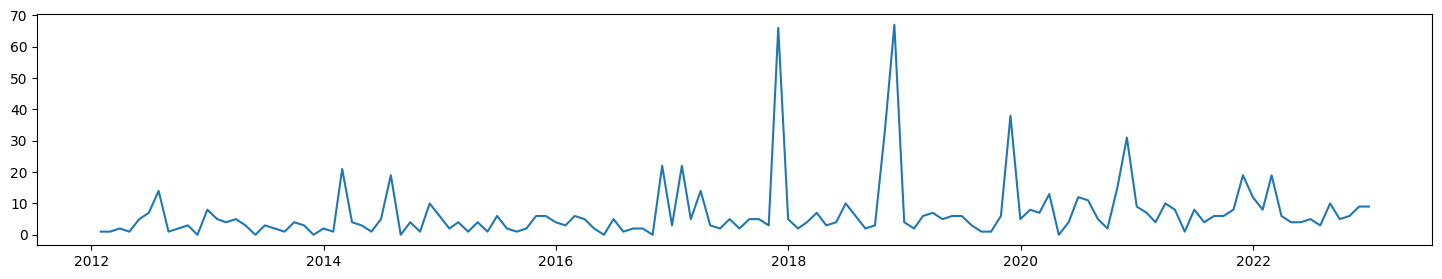

In [ ]:
#tmp_ = pd.read_csv(fname, sep=";")
#tmp_['Date'] = pd.to_datetime(tmp_['Date'], format="%d.%m.%Y")

temp = float_data[:, 0]  # статьи

tmp_

#temp
plt.figure(figsize=(18, 3))
plt.plot(tmp_["Date"], temp)
plt.show()

На графике нельзя заметить четкую годовую периодичность количества статей от месяца, но она есть.

## Реккурентная сетка
Написать и обучить свою реккурентную сеть для прогнозирования потока статей в научный журнал.



In [ ]:
tmp = pd.read_csv(fname,sep=";")

tmp['Date'] = pd.to_datetime(tmp['Date'], format="%d.%m.%Y")

def getWindows(x):
    X.append(x.values.copy())
    return 0

WINDOW_SIZE = 1
X = []
tmp.rolling(WINDOW_SIZE+1).apply(getWindows)
X = np.array(X)
y = X[:, WINDOW_SIZE:].copy()
X = X[:, :WINDOW_SIZE].copy()
X_train = X[:X.shape[0]*10//11].copy()
y_train = y[:y.shape[0]*10//11].copy()

X_test = X[X.shape[0]*10//11:].copy()
y_test = y[y.shape[0]*10//11:].copy()

#X_test

#scaler=StandardScaler()

#scaler = StandardScaler().fit(X_train)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


<ipython-input-9-d70d62c13b75>:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  tmp.rolling(WINDOW_SIZE+1).apply(getWindows)


In [ ]:
#X.shape, y.shape, X_test.shape, y_test.shape, X_train.shape, y_train.shape
#y_test=y_test/300

y_test

array([[ 8.],
       [19.],
       [ 6.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 3.],
       [10.],
       [ 5.],
       [ 6.],
       [ 9.],
       [ 9.]])

In [ ]:
#MAX_VAL = np.abs(y_train).max()
tensor_X_train = torch.autograd.Variable(torch.Tensor(X_train))
tensor_y_train = torch.autograd.Variable(torch.Tensor(y_train))

tensor_X_test = torch.autograd.Variable(torch.Tensor(X_test))
tensor_y_test = torch.autograd.Variable(torch.Tensor(y_test))

dataset = TensorDataset(tensor_X_train, tensor_y_train)

dataset_test = TensorDataset(tensor_X_test, tensor_y_test)

dataloader = {}
dataloader['train'] = DataLoader(dataset, batch_size=64, shuffle=True)
dataloader['test'] = DataLoader(dataset_test, batch_size=64, shuffle=True)
del dataset, dataset_test

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.autograd.Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size,device=x.device))

        c_0 = torch.autograd.Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size,device=x.device))


        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

In [ ]:
learning_rate = 0.05

input_size = 1
hidden_size = 100
num_layers = 1

num_classes = 1

model = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # среднекврадратическое отклонение
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# добавляем постепенное уменьшение шага
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.005)

Эпоха: 30
Лучший коэффициент детерминации: 16.758155822753906
Текущий коэффициент детерминации: 16.758155822753906


  0%|          | 0/60 [00:00<?, ?it/s]

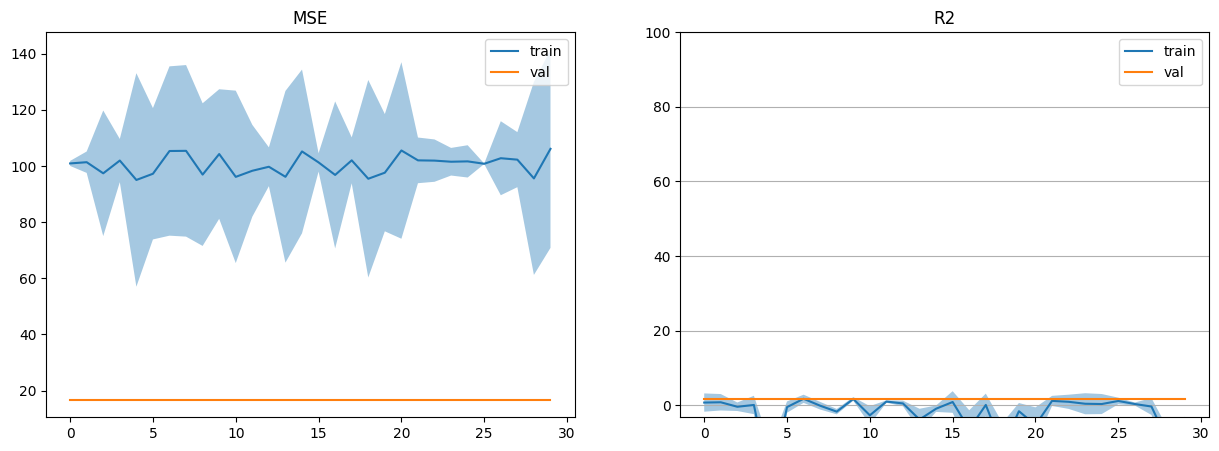

Обучение закончено за 21.655269384384155 секунд


In [ ]:
EPOCHS = 30
REDRAW_EVERY = 1
steps_per_epoch = len(dataloader['train'])
steps_per_epoch_val = len(dataloader['test'])
# NEW
pbar = tqdm(total=EPOCHS*steps_per_epoch)
losses = []
losses_val = []
passed = 0
# для создания чекпоинта
best_loss = np.inf
checkpoint_path = 'ts.pth'


if torch.cuda.is_available():
  model.cuda()
  #inputs = inputs.cuda()
  model = model.cuda()


for epoch in range(EPOCHS):  # проход по набору данных несколько раз
    tmp = []
    model.train()
    for i, batch in enumerate(dataloader['train'], 0):
        # получение одного минибатча; batch это двуэлементный список из [inputs, labels]
        inputs, labels = batch
        # на GPU
        #inputs, labels = inputs.to(device), labels.to(device)
        inputs, labels, model = inputs.to(device), labels.to(device), model.to(device)


        # очищение прошлых градиентов с прошлой итерации
        optimizer.zero_grad()

        # прямой + обратный проходы + оптимизация
        outputs = model(inputs.view(-1, X_test.shape[1], 1))
        #outputs = model(inputs.view(-1, tensor_X_test.shape[1], 1))

        print(outputs,labels)

        loss = criterion(outputs, labels)


        #loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # для подсчёта статистик
        accuracy = 100*r2_score(labels.cpu().detach().numpy(), outputs.cpu().detach().numpy())

        #ax.plot(x_arr, model_sum[0].cpu().detach().numpy(), '-o', label='Train Loss')

        tmp.append((loss.item(), accuracy))
        pbar.update(1)
    losses.append((np.mean(tmp, axis=0),
                   np.percentile(tmp, 25, axis=0),
                   np.percentile(tmp, 75, axis=0)))
    scheduler.step() # обновляем learning_rate каждую эпоху
    tmp = []
    model.eval()
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)
#

            outputs = model(inputs.view(-1, X_test.shape[1], 1))
            loss = criterion(outputs, labels)
            accuracy = 100*r2_score(labels.cpu().detach().numpy(), outputs.cpu().detach().numpy())
            tmp.append((loss.item(), accuracy))
    losses_val.append((np.mean(tmp, axis=0),
                       np.percentile(tmp, 25, axis=0),
                       np.percentile(tmp, 75, axis=0)))
    # сохранение чекпоинта
    loss = losses_val[-1][0][0]
    if loss < best_loss:
        best_loss = loss
        torch.save(model.state_dict(), checkpoint_path)
    # обновление графиков
    if (epoch+1) % REDRAW_EVERY != 0:
        continue
    clear_output(wait=False)
    print('Эпоха: %s\n'
          'Лучший коэффициент детерминации: %s\n'
          'Текущий коэффициент детерминации: %s' % (epoch+1, best_loss, loss))
    passed += pbar.format_dict['elapsed']
    pbar = tqdm(total=EPOCHS*steps_per_epoch, miniters=5)
    pbar.update((epoch+1)*steps_per_epoch)
    x_vals = np.arange(epoch+1)
    _, ax = plt.subplots(1, 2, figsize=(15, 5))
    stats = np.array(losses)
    stats_val = np.array(losses_val)
    ax[1].set_ylim(stats_val[:, 0, 1].min()-5, 100)
    ax[1].grid(axis='y')
    for i, title in enumerate(['MSE', 'R2']):
        ax[i].plot(x_vals, stats[:, 0, i], label='train')
        ax[i].fill_between(x_vals, stats[:, 1, i],
                           stats[:, 2, i], alpha=0.4)
        ax[i].plot(x_vals, stats_val[:, 0, i], label='val')
        ax[i].fill_between(x_vals,
                           stats_val[:, 1, i],
                           stats_val[:, 2, i], alpha=0.4)
        ax[i].legend()
        ax[i].set_title(title)
    plt.show()
model.load_state_dict(torch.load(checkpoint_path))
print('Обучение закончено за %s секунд' % passed)

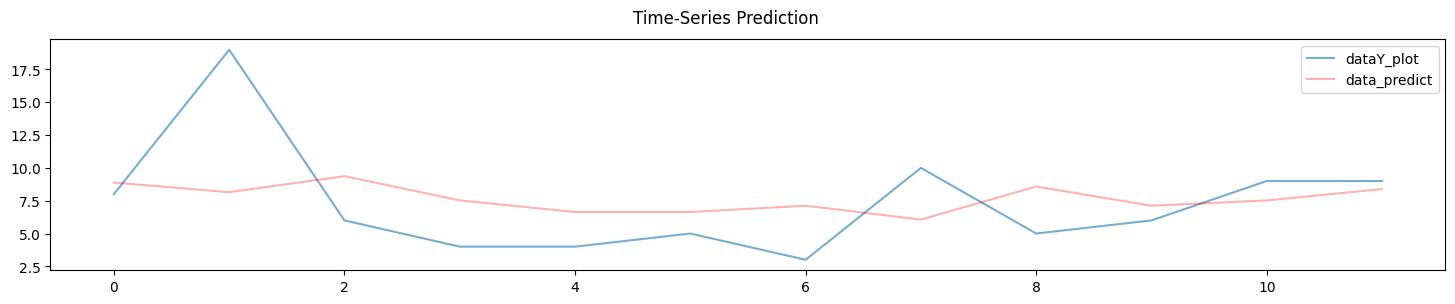

In [ ]:
model.eval()

#if torch.cuda.is_available():
  #model.cuda()
  #inputs = inputs.cuda()
  #model = model.cuda()


if torch.cuda.is_available():
    model = model.cuda()
    #test = test.cuda()
    tensor_X_test=tensor_X_test.to(device)
    #outputs.cpu().detach().numpy()
    tensor_X_test.cpu()

#for m in model.parameters():
 #   print(m.device) #return cuda:0

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#data = data.to(device)
#model = model.to("cuda:0")

train_predict = model(tensor_X_test.view(-1, WINDOW_SIZE, 1)).cpu()

data_predict = train_predict.data.numpy()#*MAX_VAL
dataY_plot = tensor_y_test.data.numpy()#*MAX_VAL

#plt.plot(np.cumsum(dataY_plot), label='dataY_plot')
#plt.plot(np.cumsum(data_predict), color='r', label='data_predict')

plt.figure(figsize=(18, 3))
plt.plot(dataY_plot[:12], label='dataY_plot',alpha=0.6)
plt.plot(data_predict[:12], color='r', label='data_predict',alpha=0.3)

plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [ ]:
# Рекуррентный прогноз
model.eval()
last_value = tensor_X_test[0].clone()
preds = []

if torch.cuda.is_available():
    model = model.cuda()

with torch.no_grad():
    for i in tqdm(range(y_test.shape[0])):
        preds.append(model(last_value.view(-1, WINDOW_SIZE, 1)))#.cpu().detach().item())
        last_value[:-1] = last_value[1:].clone()
        last_value[-1:] = preds[-1]
#preds = np.array(preds.cpu().detach().numpy())# * MAX_VAL

#plt.plot(np.cumsum(y_test))
#plt.plot(np.cumsum(preds))


        #accuracy = 100*r2_score(labels.cpu().detach().numpy(), outputs.cpu().detach().numpy())


  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
preds[1]

tensor([[8.3593]], device='cuda:0')

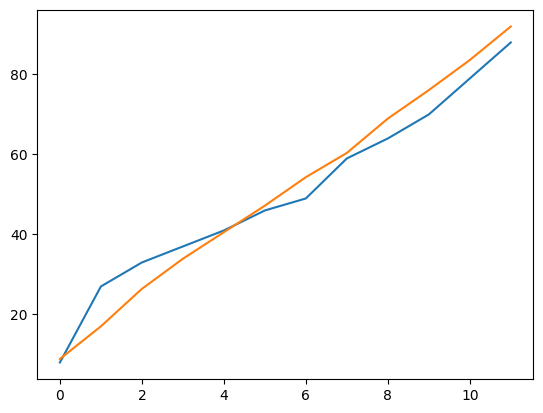

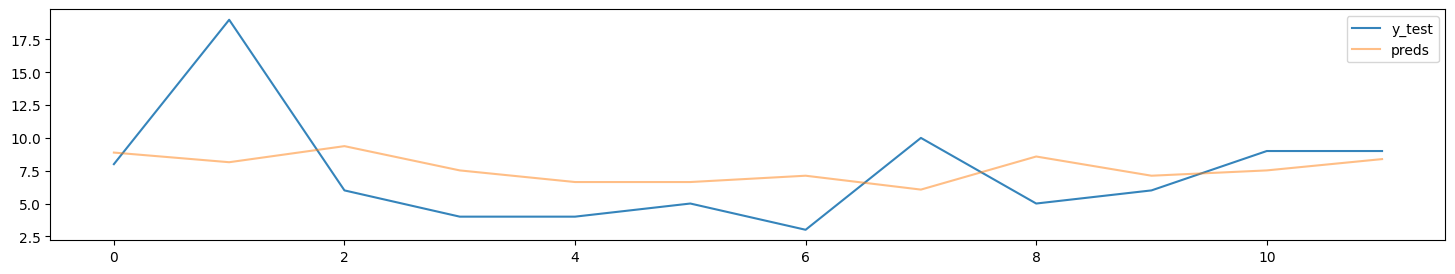

In [ ]:
#np_a = tensor.numpy()
#np_b = tensor.detach().numpy()
#np_c = tensor.detach().cpu().numpy()

#preds=preds.detach().cpu().numpy()

#preds = torch.tensor(preds).cuda().data.cpu().numpy()
preds = torch.tensor(preds).data.cpu().numpy()

preds = np.array(preds)# * MAX_VAL
plt.plot(np.cumsum(y_test),label="y_test")
plt.plot(np.cumsum(data_predict),label="preds")
plt.figure(figsize=(18, 3))

plt.plot(y_test,label="y_test",alpha=0.9)
plt.plot(data_predict,label="preds",alpha=0.5)

plt.legend()


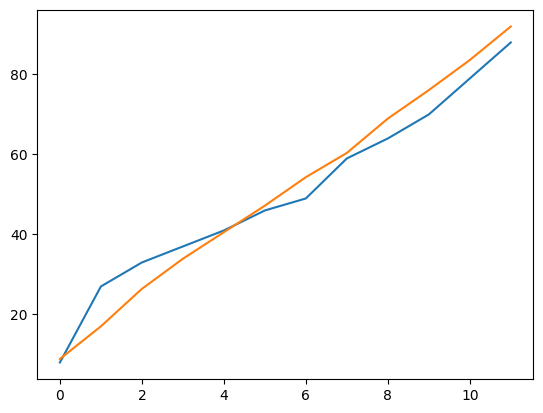

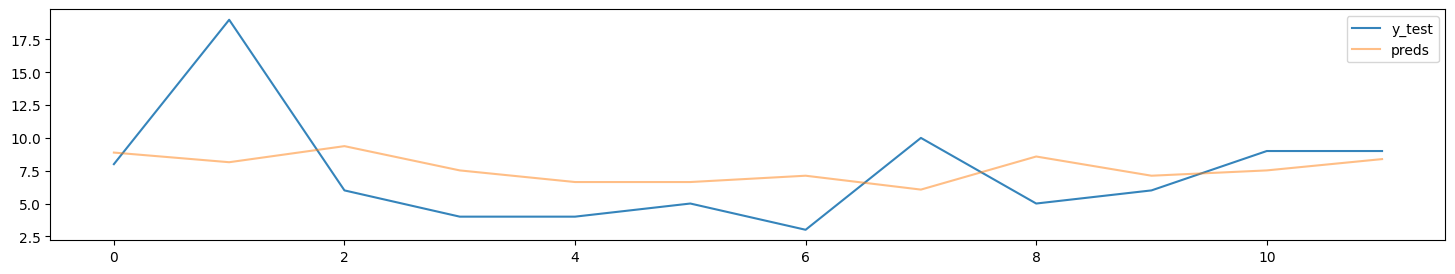

In [ ]:
plt.plot(np.cumsum(y_test),label="y_test")
plt.plot(np.cumsum(data_predict),label="preds")
plt.figure(figsize=(18, 3))

plt.plot(y_test,label="y_test",alpha=0.9)
plt.plot(data_predict,label="preds",alpha=0.5)

plt.legend()


In [ ]:
X_name = pd.read_csv(fname, sep=";")

X_name.tail()

,Date,Count
4014,NaN,NaN
4015,NaN,NaN
4016,NaN,NaN
4017,NaN,NaN
4018,NaN,NaN


<ipython-input-31-44963acbcd2b>:14: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=6)
<ipython-input-31-44963acbcd2b>:17: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=6)


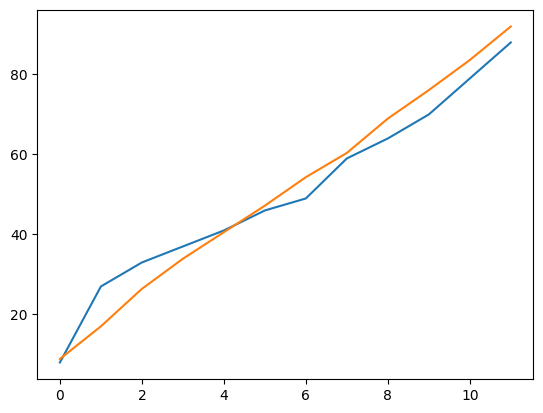

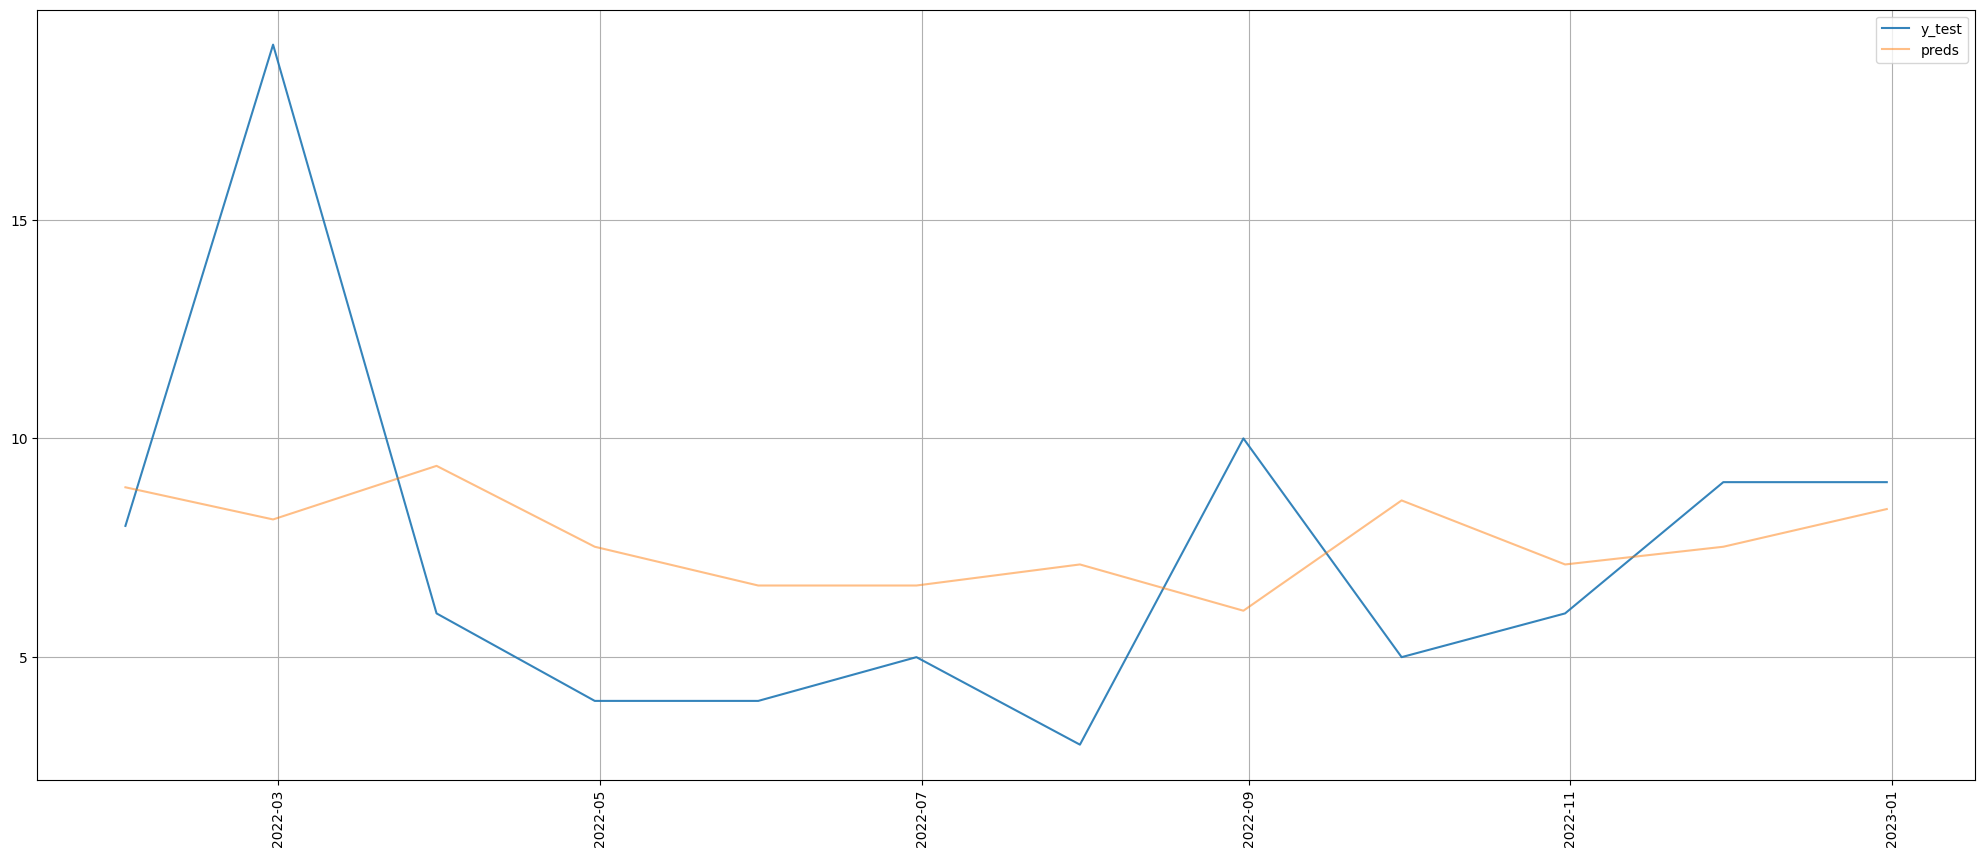

In [ ]:
plt.plot(np.cumsum(y_test),label="y_test")
plt.plot(np.cumsum(data_predict),label="preds")
plt.figure(figsize=(25, 10))

#plt.locator_params(axis='y', nbins=6)
#plt.locator_params(axis='x', nbins=4)



#plt.locator_params(nbins=6)
plt.xticks(rotation=90)

plt.plot(tmp_["Date"][-12:],y_test,label="y_test",alpha=0.9)
plt.locator_params(nbins=6)

plt.plot(tmp_["Date"][-12:],data_predict,label="preds",alpha=0.5)
plt.locator_params(nbins=6)
plt.xticks(rotation=90, fontsize = 10)
plt.xticks()
plt.grid(True)

plt.legend()
plt.show()


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5]),
 [Text(-2.5, 0, '−2.5'),
  Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5')])

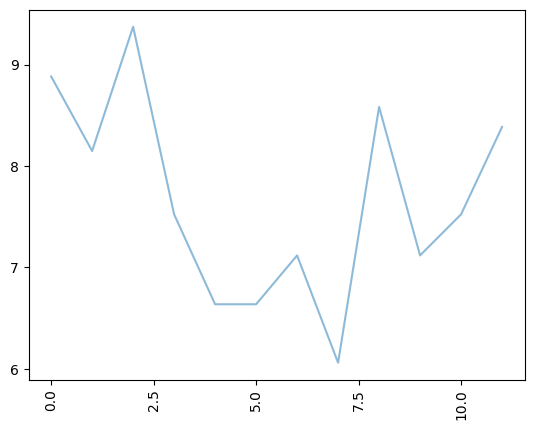

In [ ]:
plt.plot(data_predict,label="preds",alpha=0.5)
plt.locator_params(nbins=6)
plt.xticks(rotation=90, fontsize = 10)